# PHYS 105A:  Introduction to Scientific Computing

## The `Python` Programming Language (continued)

Module, Class, Package

4


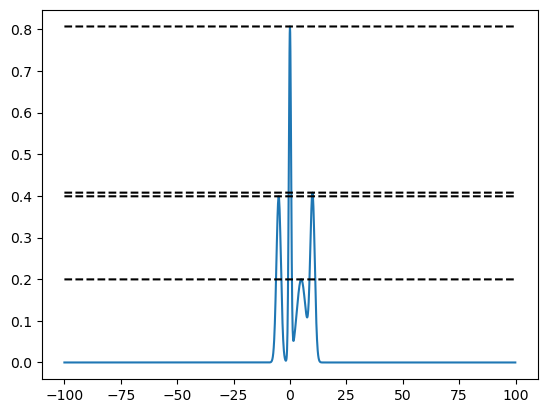

In [2]:
# Problem 1:
#
# write a function that returns all the peaks in the last plot of the lecture
# find all the peaks, and mark them in the plot

import math
from matplotlib import pyplot as plt

mu = 0.
sigma = 1.
x = [i/10*sigma for i in range(-1000,1000)] # first definition of list x

gausd = { # first definition of the Gaussian dictionary for multigaus
    '1':{'mu':-5.,'sigma':1.},
    '2':{'mu':0.,'sigma':0.5},
    '3':{'mu':5.,'sigma':2.},'4':{'mu':10,'sigma':1}
        }

class mygaus:

    expression = '1/(σ*sqrt(2π)) * exp(-(x-μ)^2/(2*σ^2))'         # class variable shared by all instances

    def __init__(self, name, gausd):
        self.name = name    # instance variable unique to each instance
        self.gausd = gausd
        self.components = len(gausd.keys())
        self.means = [gausd[k]['mu'] for k in sorted(gausd.keys())]
        self.sigmas = [gausd[k]['sigma'] for k in sorted(gausd.keys())]
        
    def add_component(self,mu,sigma):
        self.gausd[str(self.components+1)] = {'mu':mu,'sigma':sigma}
        self.components += 1
        self.means.append(mu)
        self.sigmas.append(sigma)

    def df(self,x,y,x0):
        if x0 < min(x) or x0 > max(x):
            raise Exception('x0 is not within the function x range')
        ind = 0
        while x[ind] < x0: # what's the assumption here?
            ind += 1
        # indices around x0
        ind2 = ind
        ind1 = ind - 1
        return (y[ind2]-y[ind1])/(x[ind2]-x[ind1])

    # def peak(self,x,y):
    #     list_peak = []
    #     ind1 = 0
    #     ind2 = 1
    #     peaks = False
    #     while not peaks:
    #         try:
    #             if abs(y[ind2]-y[ind1])/(x[ind2]-x[ind1]) > 0.1:
    #                 ind1 += 1
    #                 ind2 += 1
    #             elif abs(y[ind2]-y[ind1])/(x[ind2]-x[ind1]) < 0.1:
    #                 list_peak.append(x[ind1])
    #                 ind1 += 1
    #                 ind2 += 1
    #             else:
    #                 peaks = True
    #         except IndexError:
    #             return list_peak
                
        
    
        
         
    
    def gaus(self,X,mu,sigma):
        return 1./(sigma*math.sqrt(2.*math.pi)) * math.exp(-(X-mu)**2/(2.*sigma**2))
    
    def multigaus(self,X):
        d=self.gausd
        out = 0.
        for k in d.keys():
            mu = d[k]['mu']
            sigma = d[k]['sigma']
            out += self.gaus(X,mu,sigma)
        return out
         
    def export(self,x):
        y = [self.multigaus(X) for X in x]
        return y
           
mg = mygaus('gaus1',gausd)
f_x = mg.export(x)
# peak = mg.peak(x,f_x)
# print(peak)
fir_f_x = [mg.df(x,f_x,X) for X in x]
sec_f_x = [mg.df(x,fir_f_x,X) for X in x]
x_peak = []
y_peak = []
index = 0
while index < len(x):
    if 0 <= fir_f_x[index] <= 0.18 and sec_f_x[index] <= -0.04:
        if float(math.ceil(x[index])) not in x_peak:
            for i in range(len(x)):
                if x[i] == float(math.ceil(x[index])):
                    x_peak.append(x[i])
                    y_peak.append(f_x[i])
            
    
    index += 1

plt.plot(x,f_x)
print(len(y_peak))
for i in range(len(y_peak)):
    yy1 = [y_peak[i] for X in x]
    plt.plot(x,yy1,'k--')

plt.show()

# plt.subplot(2,2,1)
# plt.xlabel("f(x)")
# plt.plot(x,f_x,"ob")
# plt.subplot(2,2,2)
# plt.xlabel("f'(x)")
# plt.plot(x,fir_f_x,"og")
# plt.subplot(2,2,3)
# plt.xlabel('f"(x)')
# plt.plot(x,sec_f_x,"or")
# plt.subplot(2,2,4)
# plt.plot(x,f_x,"ob")
# plt.plot(x,fir_f_x,"og")
# plt.plot(x,sec_f_x,"or")
# plt.show()
